In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import List
import pathlib

In [2]:
import matplotlib

font = {'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
repo_dir = str(pathlib.Path.home()) + '/classifier-studies/'

plot_directory = (
    repo_dir + 'plots/'
    + 'HBDT/'
    + 'hyperparameter_optimization/'
)

pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

In [4]:
## Two options:
## 'balance': same number of training events for signal and bkg
## 'bkgskew' uses 4 mln events of bkg, 500k of signal
dataset_type = 'balance'

In [5]:
if dataset_type not in ['balance', 'bkgskew']:
    raise ValueError

In [6]:
## What you ran perform_grid_search with
scanned_grid = {
    'learning_rate': [0.003, 0.006, 0.010, 0.015],
    'max_leaf_nodes': [100, 200, 400, 800],
    'max_iter'    : [1500, 2500, 5000],
}

In [7]:
csv_dir = './results/'
csv_file = csv_dir + 'HBDT_crossval_results_' + dataset_type + '.csv'

In [8]:
df_cvres = pd.read_csv(csv_file)
df_cvres

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,38.076710,2.740693,0.769815,0.019862,0.003,1500,100,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.989661,0.988269,...,0.989017,0.000464,48,0.992729,0.992798,0.992801,0.992815,0.992889,0.992806,5.099229e-05
1,61.581155,2.248810,0.861857,0.062330,0.003,1500,200,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.990089,0.989053,...,0.989577,0.000339,47,0.995486,0.995531,0.995557,0.995608,0.995621,0.995561,4.967763e-05
2,114.929204,0.967006,0.935887,0.029730,0.003,1500,400,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.990161,0.989134,...,0.989751,0.000368,45,0.998339,0.998231,0.998342,0.998237,0.998352,0.998300,5.440380e-05
3,199.351958,3.024182,1.065766,0.088038,0.003,1500,800,"{'learning_rate': 0.003, 'max_iter': 1500, 'ma...",0.989851,0.989669,...,0.989719,0.000242,46,0.999784,0.999781,0.999721,0.999731,0.999791,0.999762,2.957976e-05
4,56.126829,1.364105,1.360650,0.045018,0.003,2500,100,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.991287,0.990663,...,0.990916,0.000243,43,0.996197,0.996216,0.996220,0.996251,0.996237,0.996224,1.836559e-05
5,99.065584,1.081852,1.448129,0.024026,0.003,2500,200,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.991436,0.990953,...,0.991108,0.000217,40,0.998804,0.998878,0.998830,0.998851,0.998849,0.998842,2.439426e-05
6,188.371453,1.716153,1.622947,0.058518,0.003,2500,400,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.991427,0.990812,...,0.991003,0.000286,42,0.999968,0.999970,0.999969,0.999970,0.999968,0.999969,9.950661e-07
7,345.077780,2.087663,1.825185,0.042511,0.003,2500,800,"{'learning_rate': 0.003, 'max_iter': 2500, 'ma...",0.991096,0.990772,...,0.990763,0.000227,44,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.930137e-17
8,106.655233,3.332371,2.514728,0.044753,0.003,5000,100,"{'learning_rate': 0.003, 'max_iter': 5000, 'ma...",0.991974,0.991373,...,0.991668,0.000221,27,0.998956,0.999008,0.999004,0.999032,0.999046,0.999009,3.076245e-05
9,191.499755,1.780975,2.845780,0.028361,0.003,5000,200,"{'learning_rate': 0.003, 'max_iter': 5000, 'ma...",0.992072,0.991552,...,0.991748,0.000237,20,0.999985,0.999988,0.999988,0.999987,0.999992,0.999988,2.143946e-06


In [9]:
## Define column 'diff_score', difference between train and test.
## Train is always better than testing, unless you somehow managed
## to create a sentient AI.
df_cvres['diff_score'] = df_cvres['mean_train_score'] - df_cvres['mean_test_score']
## Drop pointless dictionary column
df_cvres.drop(columns=['params'], inplace=True, errors='ignore')
## Rename parameter columns
df_cvres.rename({'param_max_leaf_nodes' : 'max_leaf_nodes',
                 'param_learning_rate' : 'learning_rate',
                 'param_max_iter' : 'max_iter'}, inplace=True, axis='columns', errors='ignore')

In [10]:
# ## List of hyperparameters preceded by 'param_', i.e. how they appaear in the results
# param_column_list = [f'param_{name}' for name in scanned_grid.keys()]

# ## First create test score results
# ## Extract split scores and parameter 
# df_test_scores = df_cvres.loc[:, param_column_list + [f'split{i}_test_score' for i in range(5)]]
# ## Set hyperpar values as indices
# df_test_scores.set_index(param_column_list, inplace=True)
# ## Omit split score designation, just leave the iterator
# df_test_scores.rename({f'split{i}_test_score' : i for i in range(5)}, inplace=True, axis='columns')
# ## Stack the dataframe, i.e. the splits become another multi-index
# ## I'm just riffing at this point, I have no idea why Salvatore did this
# df_test_scores = pd.DataFrame(df_test_scores.stack()).rename({0 : 'score'}, axis='columns')
# ## Create dataset column
# df_test_scores['dataset'] = 'test'
# ## Turn it into an index, fuck if I know
# df_test_scores.set_index('dataset', inplace=True, append=True)
# ## See the unnamed index from before? The split? It has a name now
# df_test_scores.index.set_names(names='split', level=len(param_column_list), inplace=True)

# ## Now do the exact same thing for train
# df_train_scores = df_cvres.loc[:, param_column_list + [f'split{i}_train_score' for i in range(5)]]
# df_train_scores.set_index(param_column_list, inplace=True)
# df_train_scores.rename({f'split{i}_train_score' : i for i in range(5)}, inplace=True, axis='columns')
# df_train_scores = pd.DataFrame(df_train_scores.stack()).rename({0 : 'score'}, axis='columns')
# df_train_scores['dataset'] = 'train'
# df_train_scores.set_index('dataset', inplace=True, append=True)
# df_train_scores.index.set_names(names='split', level=len(param_column_list), inplace=True)

# ## Concat and trash. Now the indices are columns.
# ## I'm sure there's a point, I'm just too dumb to get it
# df_scores = pd.concat([df_test_scores, df_train_scores]).reset_index()
# del(df_test_scores, df_train_scores)

# ## And now we turn the columns back into indices
# df_scores.set_index(param_column_list + ['split', 'dataset'], inplace=True)

# ## Compute difference in score
# df_scores_train = df_scores.loc[df_scores.index.get_level_values('dataset')=='train', :].droplevel('dataset', axis='rows')
# df_scores_test = df_scores.loc[df_scores.index.get_level_values('dataset')=='test', :].droplevel('dataset', axis='rows')
# df_scores_diff = df_scores_train - df_scores_test
# df_scores['score difference'] = df_scores_diff['score']

# del(df_scores_train, df_scores_test, df_scores_diff)

# df_scores.reset_index(inplace=True)
# df_scores.rename({'param_max_leaf_nodes' : 'max # of leaf nodes per tree',
#                   'param_learning_rate' : 'learning rate',
#                   'param_max_iter' : '# of trees'
#                  }, inplace=True, axis='columns')

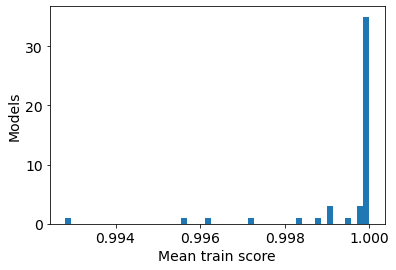

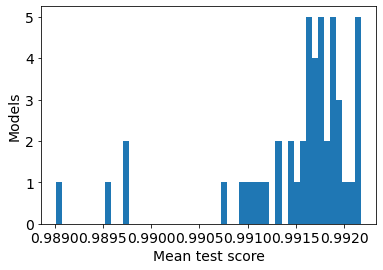

In [11]:
plt.hist(df_cvres['mean_train_score'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean train score')
plt.ylabel('Models')
plt.show()

plt.hist(df_cvres['mean_test_score'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean test score')
plt.ylabel('Models')
plt.show()

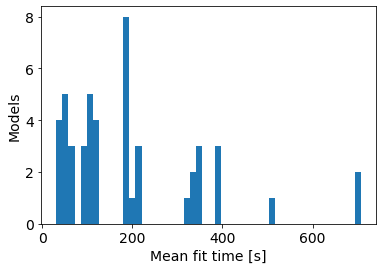

In [12]:
plt.hist(df_cvres['mean_fit_time'], bins=50, histtype='bar', stacked=True)
plt.xlabel('Mean fit time [s]')
plt.ylabel('Models')
plt.show()

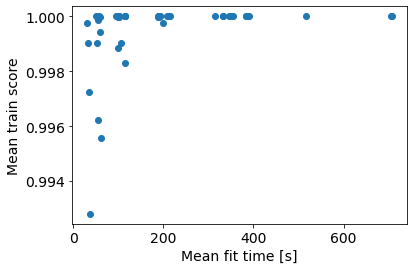

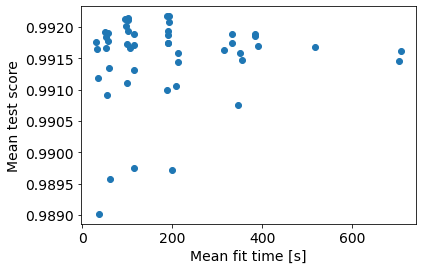

In [13]:
plt.scatter(df_cvres['mean_fit_time'], df_cvres['mean_train_score'])
plt.xlabel("Mean fit time [s]")
plt.ylabel("Mean train score")
plt.show()

plt.scatter(df_cvres['mean_fit_time'], df_cvres['mean_test_score'])
plt.xlabel("Mean fit time [s]")
plt.ylabel("Mean test score")
plt.show()

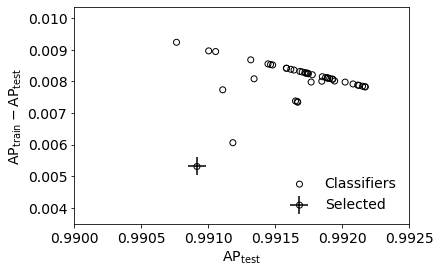

In [14]:
shamshel = df_cvres.iloc[4]

circles = plt.scatter(df_cvres['mean_test_score'], df_cvres['diff_score'], marker='o', color='k', facecolors='none')
crosses = plt.scatter(shamshel['mean_test_score'], shamshel['diff_score'], marker='+', color='k', s=300)
plt.xlim(0.99, 0.9925)
plt.xlabel(r"$\mathrm{AP}_\mathrm{test}$")
plt.ylabel(r"$\mathrm{AP}_\mathrm{train} - \mathrm{AP}_\mathrm{test}$")
plt.legend([circles, (circles, crosses)], ["Classifiers", "Selected"], frameon=False, loc='lower right')
plt.savefig(plot_directory + 'meantest_vs_diffscore' + '.pdf', bbox_inches='tight')
plt.show()

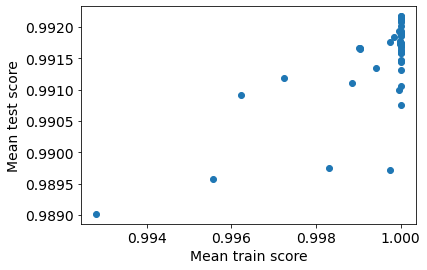

In [15]:
plt.scatter(df_cvres['mean_train_score'], df_cvres['mean_test_score'])
plt.xlabel("Mean train score")
plt.ylabel("Mean test score")
plt.show()

In [16]:
def sort_results_by(
    sort_by: str,
    columns_to_show: List[str],
    ascending: bool = True,
    test_score_threshold = -1
) -> pd.DataFrame:
    if test_score_threshold == -1:
        return df_cvres.loc[:, columns_to_show].sort_values(sort_by, ascending=ascending)
    else:
        return df_cvres.loc[df_cvres['mean_test_score'] >= test_score_threshold, columns_to_show].sort_values(sort_by, ascending=ascending)

In [17]:
columns_to_show = [
    'max_leaf_nodes',
    'learning_rate',
    'max_iter',
    'mean_train_score', 'mean_test_score', 'diff_score', 
    'std_test_score', 'mean_fit_time'
]

In [18]:
sort_results_by('diff_score', columns_to_show, test_score_threshold=0.99)

,max_leaf_nodes,learning_rate,max_iter,mean_train_score,mean_test_score,diff_score,std_test_score,mean_fit_time
4,100,0.003,2500,0.996224,0.990916,0.005309,0.000243,56.126829
12,100,0.006,1500,0.997245,0.991184,0.006061,0.000243,34.273098
8,100,0.003,5000,0.999009,0.991668,0.007341,0.000221,106.655233
16,100,0.006,2500,0.999031,0.991665,0.007366,0.000226,53.319406
24,100,0.010,1500,0.999033,0.991651,0.007382,0.000257,33.039066
5,200,0.003,2500,0.998842,0.991108,0.007734,0.000217,99.065584
33,200,0.010,5000,1.000000,0.992173,0.007827,0.000182,192.576452
45,200,0.015,5000,1.000000,0.992169,0.007831,0.000145,189.007132
44,100,0.015,5000,1.000000,0.992152,0.007848,0.000181,101.582161
41,200,0.015,2500,1.000000,0.992126,0.007874,0.000164,95.480358
